In [1]:
import numpy as np
import pickle
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


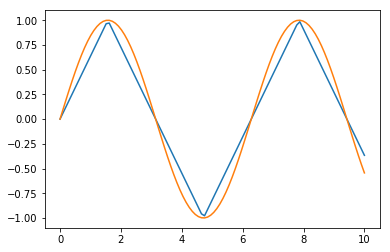

In [2]:
x=np.linspace(0,10,100)
y_sin=[np.sin(i) for i in x]
y=[]
tpi = 2/np.pi
for i in x:
    if(i%(2*np.pi)<np.pi/2):
        y.append((i%np.pi)*tpi)
    elif(i%(2*np.pi)<np.pi):
        y.append((np.pi-(i%np.pi))*tpi)
    elif(i%(2*np.pi)<1.5*np.pi):
        y.append((np.pi-(i%(2*np.pi)))*tpi)
    else:
        y.append(((i%(2*np.pi))-2*np.pi)*tpi)
plt.plot(x,y)
plt.plot(x,y_sin)
# print x[:2]

In [3]:
# padded test data
with open('../triangle_tests.pkl','rb') as fp:
    sin = np.array(pickle.load(fp))
    print sin.shape
#     print(sin[:,0])
    seq=[]
    for i in range(len(sin)):
        seq.append(sin[i][0])
    
    sinee = pad_sequences(seq,maxlen=10,dtype='float32')
    for i in range(len(sin)):
        sin[i][0] = sinee[i] 

(10, 2)


[0.         0.         0.         0.1501085  0.14947188 0.14883526
 0.14819865 0.14756203 0.1469254  0.14628878] 0.14565216508373122


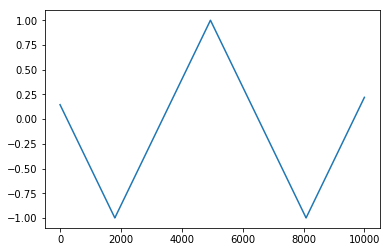

In [4]:
print sin[0][0], sin[0][1][0]
plt.plot(sin[0][1])

((40000,), (40000,))
((5324, 10, 1), (5324, 1))


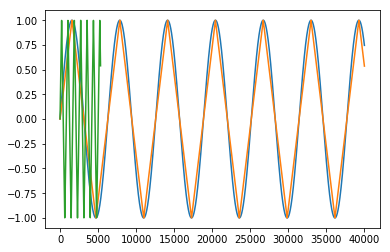

In [5]:
# Create training data
def triangle_wave(x):
    y=[]
    for i in x:
        if(i%(2*np.pi)<np.pi/2):
            y.append((i%np.pi)*tpi)
        elif(i%(2*np.pi)<np.pi):
            y.append((np.pi-(i%np.pi))*tpi)
        elif(i%(2*np.pi)<1.5*np.pi):
            y.append((np.pi-(i%(2*np.pi)))*tpi)
        else:
            y.append(((i%(2*np.pi))-2*np.pi)*tpi)
    return y
X=np.arange(0,40,0.001)
sin_wave = np.array([math.sin(x) for x in np.arange(0,40,0.001)])
tri_wave = np.array(triangle_wave(X))
print(sin_wave.shape, tri_wave.shape)
x=[]
y=[]
i=0
MAX_SEQ_LEN = 10
while(i<len(tri_wave)-MAX_SEQ_LEN):
    seq_len = np.random.randint(MAX_SEQ_LEN-5,MAX_SEQ_LEN+1)
#     seq_len = 50
#     print(i, seq_len)
    x.append(tri_wave[i:i+seq_len])
    y.append(tri_wave[i+seq_len])
    i+=seq_len
    
plt.plot(sin_wave)
plt.plot(tri_wave)
plt.plot(y)
padX = pad_sequences(x, maxlen=MAX_SEQ_LEN,dtype='float32')
x = np.array(padX)
x = np.expand_dims(x, axis=2)
y = np.array(y)
y = np.expand_dims(y, axis=1)
x,y = shuffle(x,y)
print(x.shape, y.shape)

# plt.plot(np.stack(x[0],y[0]))

In [8]:
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dense, Activation 
from keras.layers.recurrent import SimpleRNN


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train, y_train = shuffle(x, y)

in_out_neurons = 1
hidden_neurons = 5
inp = Input(batch_shape=(None,MAX_SEQ_LEN,in_out_neurons))  

rnn = SimpleRNN(hidden_neurons, return_sequences=False,stateful = False,name="RNN")(inp)

dens = Dense(in_out_neurons,name="dense")(rnn)
model = Model(inputs=[inp],outputs=[dens])
model.compile(loss="mean_squared_error", optimizer="rmsprop")

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10, 1)             0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


Train on 5057 samples, validate on 267 samples
Epoch 1/400
5057/5057 [==============================] - 0s 28us/step - loss: 8.7368e-06 - val_loss: 6.3745e-07
Epoch 2/400
5057/5057 [==============================] - 0s 24us/step - loss: 7.5637e-06 - val_loss: 2.3429e-05
Epoch 3/400
5057/5057 [==============================] - 0s 24us/step - loss: 8.3047e-06 - val_loss: 1.9549e-05
Epoch 4/400
5057/5057 [==============================] - 0s 24us/step - loss: 8.1083e-06 - val_loss: 1.0696e-06
Epoch 5/400
5057/5057 [==============================] - 0s 24us/step - loss: 7.6286e-06 - val_loss: 5.5788e-05
Epoch 6/400
5057/5057 [==============================] - 0s 24us/step - loss: 8.1959e-06 - val_loss: 1.6212e-05
Epoch 7/400
5057/5057 [==============================] - 0s 27us/step - loss: 8.1851e-06 - val_loss: 4.3358e-05
Epoch 8/400
5057/5057 [==============================] - 0s 26us/step - loss: 7.8138e-06 - val_loss: 2.5986e-05
Epoch 9/400
5057/5057 [==============================] - 

5057/5057 [==============================] - 0s 22us/step - loss: 6.1222e-06 - val_loss: 1.3452e-06
Epoch 74/400
5057/5057 [==============================] - 0s 22us/step - loss: 6.1970e-06 - val_loss: 2.3765e-05
Epoch 75/400
5057/5057 [==============================] - 0s 22us/step - loss: 6.2275e-06 - val_loss: 2.1088e-05
Epoch 76/400
5057/5057 [==============================] - 0s 22us/step - loss: 6.0106e-06 - val_loss: 2.1987e-05
Epoch 77/400
5057/5057 [==============================] - 0s 24us/step - loss: 6.2562e-06 - val_loss: 3.9917e-06
Epoch 78/400
5057/5057 [==============================] - 0s 22us/step - loss: 6.4255e-06 - val_loss: 1.2330e-06
Epoch 79/400
5057/5057 [==============================] - 0s 20us/step - loss: 5.9445e-06 - val_loss: 2.2160e-05
Epoch 80/400
5057/5057 [==============================] - 0s 31us/step - loss: 6.7585e-06 - val_loss: 2.5562e-06
Epoch 81/400
5057/5057 [==============================] - 0s 29us/step - loss: 5.2571e-06 - val_loss: 1.0093e

5057/5057 [==============================] - 0s 26us/step - loss: 4.9139e-06 - val_loss: 4.1201e-06
Epoch 146/400
5057/5057 [==============================] - 0s 24us/step - loss: 4.6896e-06 - val_loss: 5.3144e-07
Epoch 147/400
5057/5057 [==============================] - 0s 24us/step - loss: 4.4322e-06 - val_loss: 2.4126e-05
Epoch 148/400
5057/5057 [==============================] - 0s 22us/step - loss: 4.5844e-06 - val_loss: 2.5391e-06
Epoch 149/400
5057/5057 [==============================] - 0s 24us/step - loss: 4.9397e-06 - val_loss: 5.0696e-07
Epoch 150/400
5057/5057 [==============================] - 0s 25us/step - loss: 4.6563e-06 - val_loss: 2.1273e-06
Epoch 151/400
5057/5057 [==============================] - 0s 23us/step - loss: 4.3863e-06 - val_loss: 4.8293e-06
Epoch 152/400
5057/5057 [==============================] - 0s 22us/step - loss: 4.3026e-06 - val_loss: 8.3293e-06
Epoch 153/400
5057/5057 [==============================] - 0s 23us/step - loss: 4.8128e-06 - val_loss:

Epoch 217/400
5057/5057 [==============================] - 0s 24us/step - loss: 3.7658e-06 - val_loss: 1.4114e-06
Epoch 218/400
5057/5057 [==============================] - 0s 23us/step - loss: 3.9828e-06 - val_loss: 2.2036e-06
Epoch 219/400
5057/5057 [==============================] - 0s 23us/step - loss: 3.8023e-06 - val_loss: 6.2235e-06
Epoch 220/400
5057/5057 [==============================] - 0s 23us/step - loss: 3.5754e-06 - val_loss: 6.7754e-06
Epoch 221/400
5057/5057 [==============================] - 0s 25us/step - loss: 3.7739e-06 - val_loss: 1.7096e-05
Epoch 222/400
5057/5057 [==============================] - 0s 24us/step - loss: 3.6491e-06 - val_loss: 7.0043e-06
Epoch 223/400
5057/5057 [==============================] - 0s 23us/step - loss: 3.7254e-06 - val_loss: 1.5813e-07
Epoch 224/400
5057/5057 [==============================] - 0s 24us/step - loss: 3.7222e-06 - val_loss: 8.8651e-07
Epoch 225/400
5057/5057 [==============================] - 0s 23us/step - loss: 3.6540e-

Epoch 289/400
5057/5057 [==============================] - 0s 32us/step - loss: 2.7428e-06 - val_loss: 3.5881e-07
Epoch 290/400
5057/5057 [==============================] - 0s 25us/step - loss: 3.3718e-06 - val_loss: 3.1504e-07
Epoch 291/400
5057/5057 [==============================] - 0s 23us/step - loss: 3.1886e-06 - val_loss: 5.4350e-07
Epoch 292/400
5057/5057 [==============================] - 0s 23us/step - loss: 3.1625e-06 - val_loss: 1.9431e-07
Epoch 293/400
5057/5057 [==============================] - 0s 22us/step - loss: 3.1957e-06 - val_loss: 1.2196e-07
Epoch 294/400
5057/5057 [==============================] - 0s 24us/step - loss: 2.9833e-06 - val_loss: 2.3244e-06
Epoch 295/400
5057/5057 [==============================] - 0s 25us/step - loss: 3.2188e-06 - val_loss: 1.1563e-05
Epoch 296/400
5057/5057 [==============================] - 0s 25us/step - loss: 2.9914e-06 - val_loss: 4.3678e-06
Epoch 297/400
5057/5057 [==============================] - 0s 25us/step - loss: 3.2008e-

Epoch 361/400
5057/5057 [==============================] - 0s 24us/step - loss: 2.7607e-06 - val_loss: 5.2293e-07
Epoch 362/400
5057/5057 [==============================] - 0s 23us/step - loss: 2.6361e-06 - val_loss: 1.1189e-05
Epoch 363/400
5057/5057 [==============================] - 0s 24us/step - loss: 2.7437e-06 - val_loss: 1.8624e-07
Epoch 364/400
5057/5057 [==============================] - 0s 23us/step - loss: 2.7044e-06 - val_loss: 3.4302e-06
Epoch 365/400
5057/5057 [==============================] - 0s 25us/step - loss: 2.6661e-06 - val_loss: 5.8022e-06
Epoch 366/400
5057/5057 [==============================] - 0s 23us/step - loss: 2.8703e-06 - val_loss: 9.5303e-07
Epoch 367/400
5057/5057 [==============================] - 0s 26us/step - loss: 2.5962e-06 - val_loss: 1.9857e-07
Epoch 368/400
5057/5057 [==============================] - 0s 26us/step - loss: 2.7562e-06 - val_loss: 3.0120e-06
Epoch 369/400
5057/5057 [==============================] - 0s 25us/step - loss: 2.6222e-

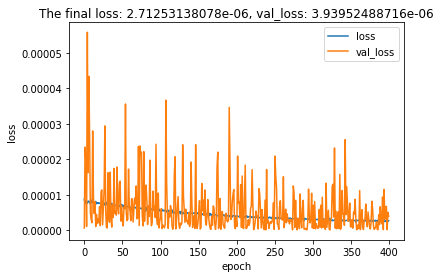

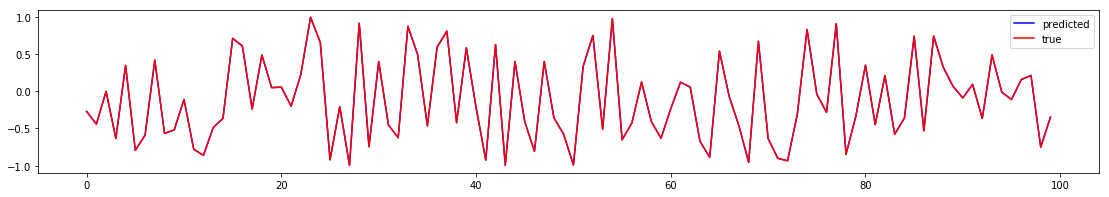

In [10]:

hist = model.fit(X_train, y_train, batch_size=60, epochs=400, 
                 verbose=True,validation_split=0.05)
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final loss: {}, val_loss: {}".format(hist.history["loss"][-1],hist.history["val_loss"][-1]))
plt.legend()
plt.show()
y_pred = model.predict(X_test)
plt.figure(figsize=(19,3))
# print(y_test[:2])
# print(y_pred[:2])
plt.plot(y_pred[:100],'b-',label="predicted")
plt.plot(y_test[:100], 'r-', label="true")
plt.legend()
plt.show()

In [13]:
from keras.models import load_model
model.save('tri_model.h5')

9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


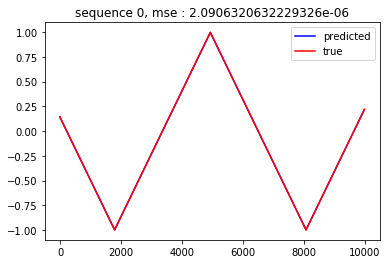

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


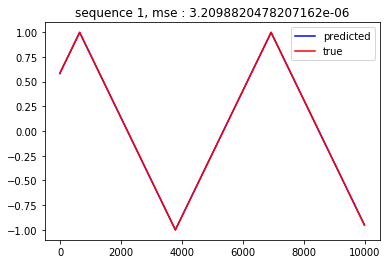

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


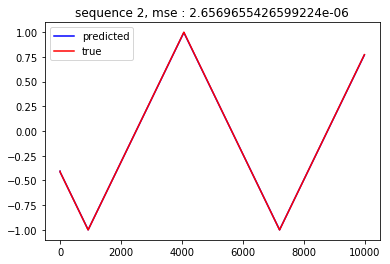

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


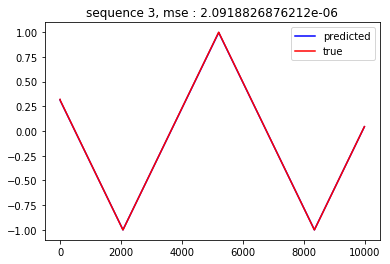

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


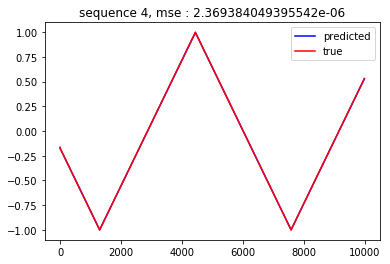

9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


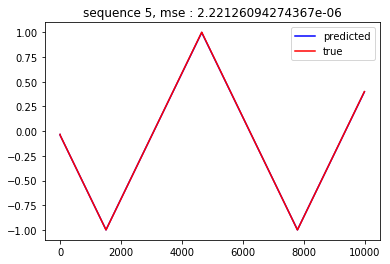

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


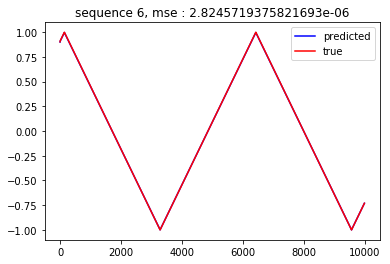

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


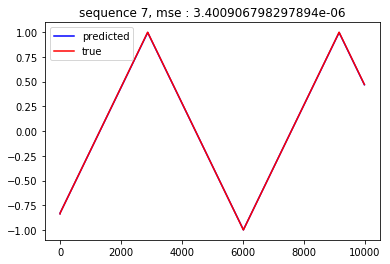

9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


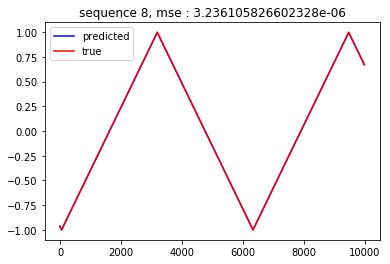

9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


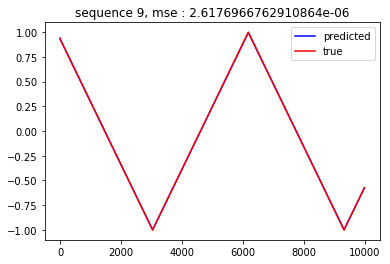

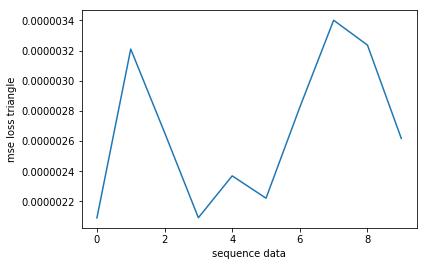

In [12]:
# Creating test data
mse=[]
for l in range(len(sin)):
    sin_test=[]
    sin_label=[]
    sin_test.append(sin[l][0])
    sin_label.append(sin[l][1][0])
    i=0
    seq_len = len(sin[l][0])
    while(i<len(sin[l][1])-MAX_SEQ_LEN):

        sin_test.append(sin[l][1][i:i+seq_len])
        sin_label.append(sin[l][1][i+seq_len])
        i+=1

    # plt.plot(sin[l][1])
    padXs = pad_sequences(sin_test, maxlen=MAX_SEQ_LEN,dtype='float32')
    sin_test = np.array(padXs)
    sin_test = np.expand_dims(sin_test, axis=2)
    sin_label = np.array(sin_label)
    sin_label = np.expand_dims(sin_label, axis=1)
    
    y_pred = model.predict(sin_test)
    z= model.evaluate(sin_test,sin_label)
    mse.append(z)
    plt.plot(y_pred[:],'b-',label="predicted")
    plt.plot(sin_label[:], 'r-', label="true")
    plt.legend()
    
    plt.title("sequence "+str(l)+", mse : "+str(model.evaluate(sin_test, sin_label)))
    print(sin_test.shape, sin_label.shape)
    plt.savefig("sequence_"+str(l)+"_tri.png")
    plt.show()
plt.plot(mse)
plt.xlabel("sequence data")
plt.ylabel("mse loss triangle")
plt.savefig('mse_loss_tri.png')
plt.show()

1332/1332 [==============================] - 0s 63us/step
5.656060443334218e-07


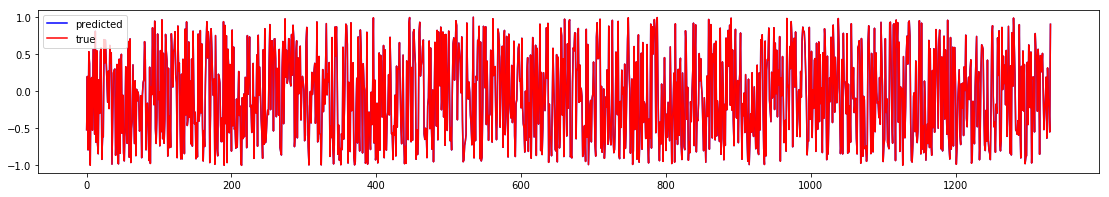

In [97]:
# sin_test,sin_label = shuffle(sin_test,sin_label)
print( model.evaluate(sin_test, sin_label))
y_pred = model.predict(sin_test)
plt.figure(figsize=(19,3))
# print(sin_label[:2])
# print(y_pred[:2])
plt.plot(y_pred[:],'b-',label="predicted")
plt.plot(sin_label[:], 'r-', label="true")
plt.legend()
plt.show()

[[-0.39795856]
 [ 0.14819105]]
[[-0.3978786 ]
 [ 0.14769226]]


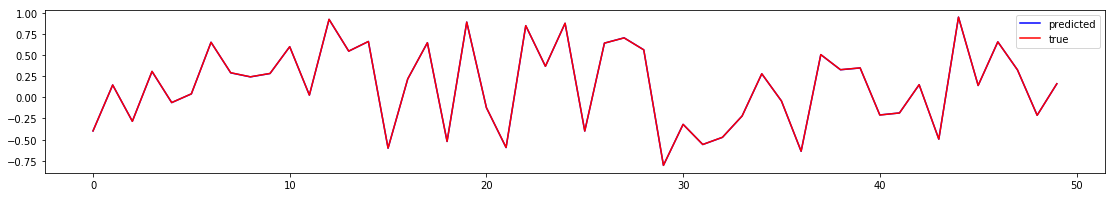

In [98]:
# sin_test,sin_label = shuffle(sin_test,sin_label)
y_pred = model.predict(X_test)
plt.figure(figsize=(19,3))
print(y_test[:2])
print(y_pred[:2])
plt.plot(y_pred[:50],'b-',label="predicted")
plt.plot(y_test[:50], 'r-', label="true")
plt.legend()
plt.show()

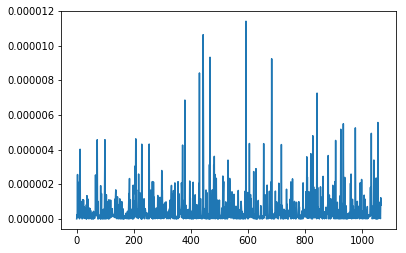

In [109]:
plt.plot(((y_test-y_pred)*(y_test-y_pred))[:])

((1335, 10, 1), (1335, 1))
1335/1335 [==============================] - 0s 27us/step
5.807694236956307e-07
((1326, 10, 1), (1326, 1))
1326/1326 [==============================] - 0s 30us/step
5.976069651162962e-07
((1333, 10, 1), (1333, 1))
1333/1333 [==============================] - 0s 29us/step
6.163829553802552e-07
((1332, 10, 1), (1332, 1))
1332/1332 [==============================] - 0s 33us/step
5.640137539951349e-07
((1330, 10, 1), (1330, 1))
1330/1330 [==============================] - 0s 36us/step
6.01555596257045e-07
((1339, 10, 1), (1339, 1))
1339/1339 [==============================] - 0s 29us/step
5.956875758075567e-07
((1335, 10, 1), (1335, 1))
1335/1335 [==============================] - 0s 25us/step
6.338541165757888e-07
((1337, 10, 1), (1337, 1))
1337/1337 [==============================] - 0s 38us/step
6.823963197300051e-07
((1329, 10, 1), (1329, 1))
1329/1329 [==============================] - 0s 60us/step
6.692243951369112e-07
((1332, 10, 1), (1332, 1))
1332/1332 [

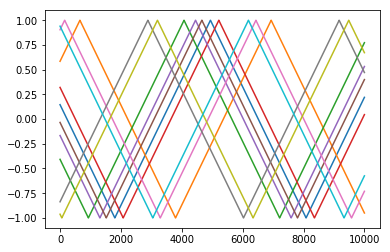

In [95]:
for l in range(len(sin)):
    sin_test=[]
    sin_label=[]
    sin_test.append(sin[l][0])
    sin_label.append(sin[l][1][0])
    i=0
    while(i<len(sin[l][1])-10):
        seq_len = np.random.randint(5,11)
    #     seq_len = 50
    #     print(i, seq_len)
        sin_test.append(sin[l][1][i:i+seq_len])
        sin_label.append(sin[l][1][i+seq_len])
        i+=seq_len

    plt.plot(sin[l][1])
    padXs = pad_sequences(sin_test, maxlen=10,dtype='float32')
    sin_test = np.array(padXs)
    sin_test = np.expand_dims(sin_test, axis=2)
    sin_label = np.array(sin_label)
    sin_label = np.expand_dims(sin_label, axis=1)
    sin_test,sin_label = shuffle(sin_test,sin_label)
    print(sin_test.shape, sin_label.shape)
    print model.evaluate(sin_test,sin_label)
plt.show()